In [28]:
# DAL Library
# version 0.1.0

source("load_harbinger.R")

#loading Harbinger
load_harbinger() # see ../load_harbinger.R 

In [29]:
#loading the example database
data(har_examples)

In [30]:
#Using the time series 1 
dataset <- har_examples[[1]]
head(dataset)

serie     event
1 1.0000000 FALSE
2 0.9689124 FALSE
3 0.8775826 FALSE
4 0.7316889 FALSE
5 0.5403023 FALSE
6 0.3153224 FALSE

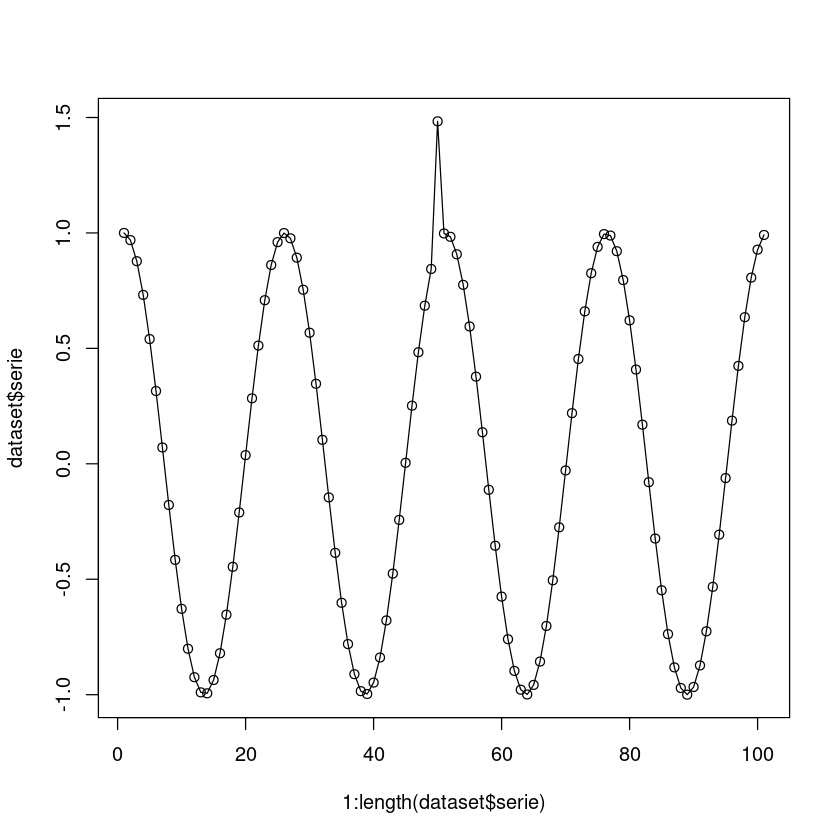

In [31]:
#ploting serie #1

plot(x = 1:length(dataset$serie), y = dataset$serie)
lines(x = 1:length(dataset$serie), y = dataset$serie)

In [32]:
# establishing arima method 
  library(randomForest)
  model <- har_tsreg_sw(ts_elm(ts_gminmax(), input_size=4, nhid=3, actfun="purelin"))

In [33]:
# fitting the model
  model <- fit(model, dataset$serie)

ts_elm,0.000



[1] "ts_elm"


In [34]:
# making detections using fbiad
  detection <- detect(model, dataset$serie)

In [35]:
# filtering detected events
  print(detection |> dplyr::filter(event==TRUE))

  idx event    type
1  50  TRUE anomaly
2  52  TRUE anomaly


In [36]:
# evaluating the detections
  evaluation <- evaluate(model, detection$event, dataset$event)
  print(evaluation$confMatrix)

          event      
detection TRUE  FALSE
TRUE      1     1    
FALSE     0     99   


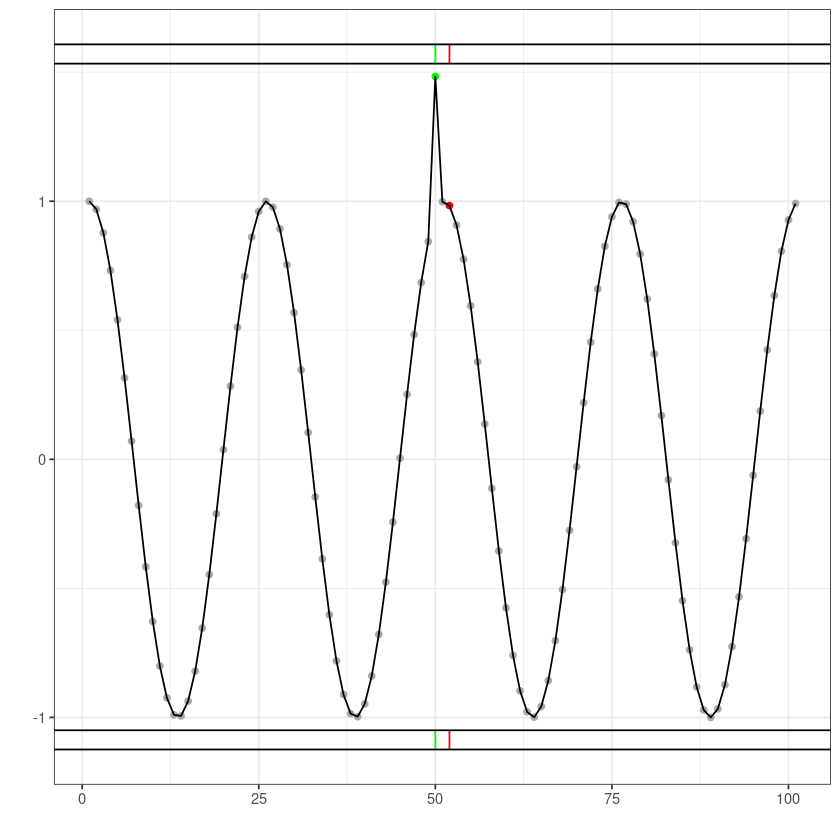

In [37]:
# ploting the results
  grf <- plot.harbinger(model, dataset$serie, detection, dataset$event)
  plot(grf)